In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
url1 = "data/df_final_demo_cleanead.csv"
url2 = "data/datadf_experiment_non_nan.csv"
url3 = "data/df_web_data_total.csv"

df_final_demo_drop_nulls = pd.read_csv(url1)
df_final_experiment_cleaned = pd.read_csv(url2)
df_web_data_total = pd.read_csv(url3)

In [3]:
merge_demo_experiment = pd.merge(
    df_final_demo_drop_nulls,
    df_final_experiment_cleaned[["client_id", "Variation"]],
    on = "client_id",
    how = "left"
)

merge_demo_experiment

,client_id,seniority_per_years,seniority_per_months,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70590,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Test
70591,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Test
70592,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Test
70593,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Test


In [4]:
merge_demo_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70595 entries, 0 to 70594
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             70595 non-null  int64  
 1   seniority_per_years   70595 non-null  float64
 2   seniority_per_months  70595 non-null  float64
 3   age                   70595 non-null  float64
 4   gender                70595 non-null  object 
 5   number_of_accounts    70595 non-null  float64
 6   balance               70595 non-null  float64
 7   calls_6_month         70595 non-null  float64
 8   logons_6_month        70595 non-null  float64
 9   Variation             70595 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


In [5]:
gender_distribution = merge_demo_experiment['gender'].value_counts()
gender_distribution


gender
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

**Categorical variables**:
- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

Text(0.5, 1.0, 'Gender Distribution of Clients')

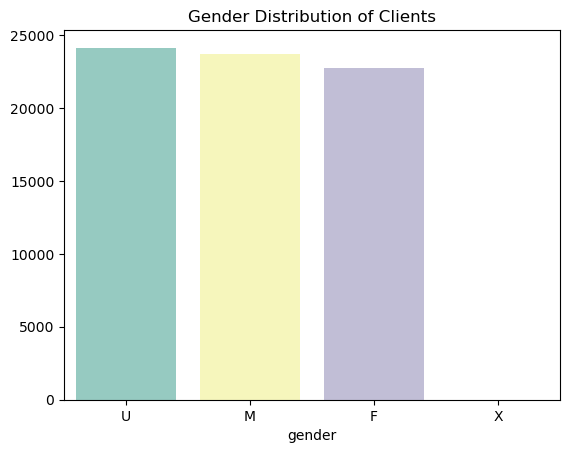

In [6]:
sns.barplot(x = gender_distribution.index, y = gender_distribution.values, hue = gender_distribution.index, palette = "Set3") 
plt.title("Gender Distribution of Clients")

<Axes: ylabel='count'>

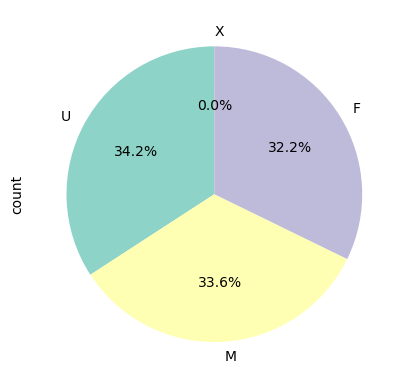

In [7]:
merge_demo_experiment["gender"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

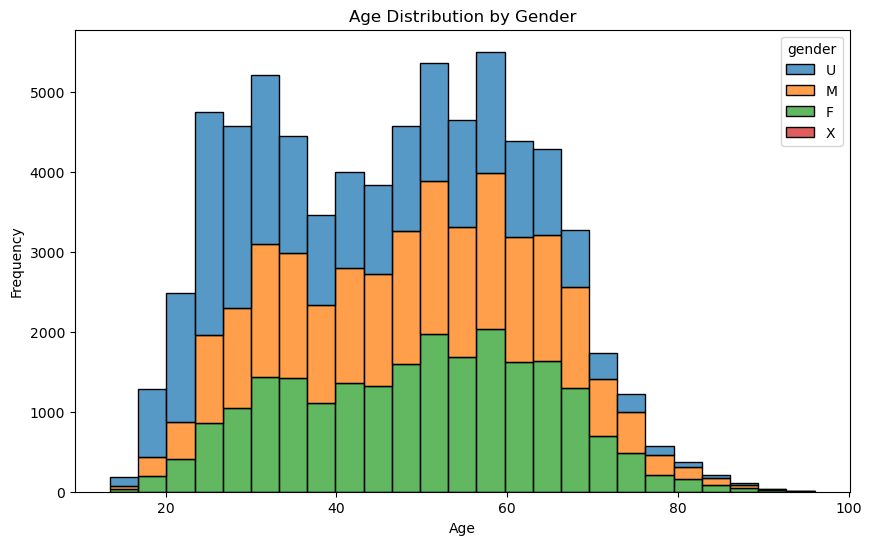

In [8]:
# Gráfico de distribución de edades por género
plt.figure(figsize=(10, 6))
sns.histplot(data=merge_demo_experiment, x='age', hue='gender', multiple='stack', bins=25)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
merge_demo_experiment.describe()

,client_id,seniority_per_years,seniority_per_months,age,number_of_accounts,balance,calls_6_month,logons_6_month
count,7.059500e+04,70595.000000,70595.000000,70595.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.005021e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877269e+06,6.871819,82.089854,15.591162,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016969e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483064e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [10]:
mean_price = merge_demo_experiment["age"].mean()  
median_price = merge_demo_experiment["age"].median() 
mode_price = merge_demo_experiment["age"].mode()[0]  

mean_price, median_price, mode_price

(46.442240133722414, 47.0, 58.5)

<Axes: xlabel='age', ylabel='Count'>

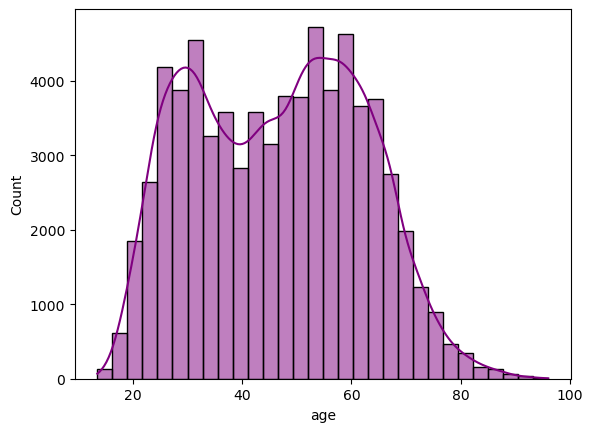

In [11]:
sns.histplot(merge_demo_experiment['age'], kde=True, bins = 30, color= "purple")

<Axes: ylabel='balance'>

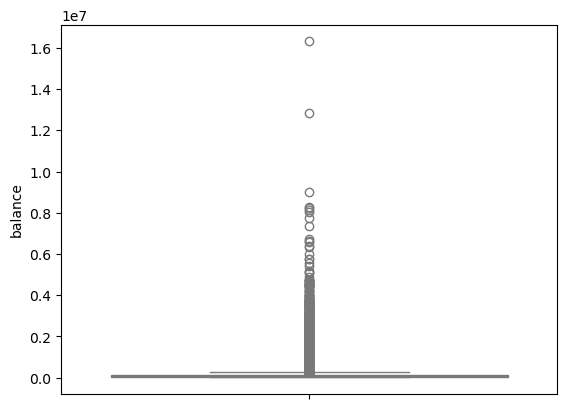

In [12]:
sns.boxplot(data = merge_demo_experiment["balance"], color = "lightblue")

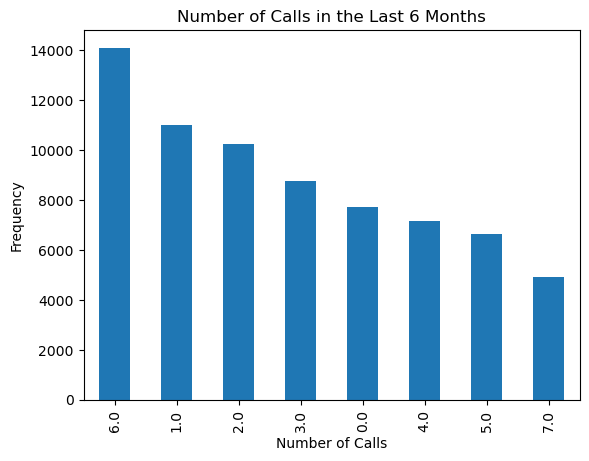

In [13]:
#
merge_demo_experiment['calls_6_month'].value_counts().plot(kind='bar')
plt.title("Number of Calls in the Last 6 Months")
plt.xlabel("Number of Calls")
plt.ylabel('Frequency')
plt.show()


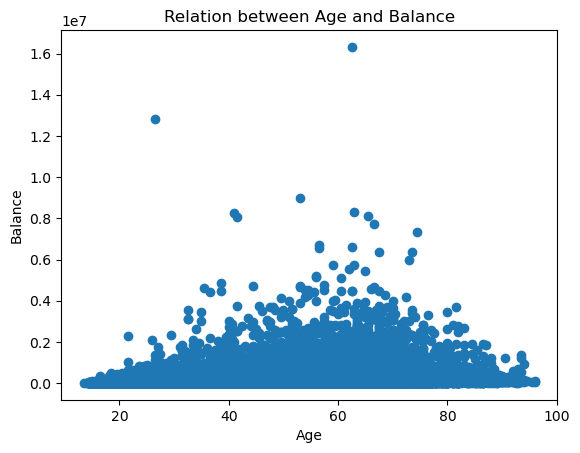

In [14]:
#Relación entre la edad y el balance
plt.scatter(merge_demo_experiment["age"], merge_demo_experiment["balance"])
plt.title("Relation between Age and Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()


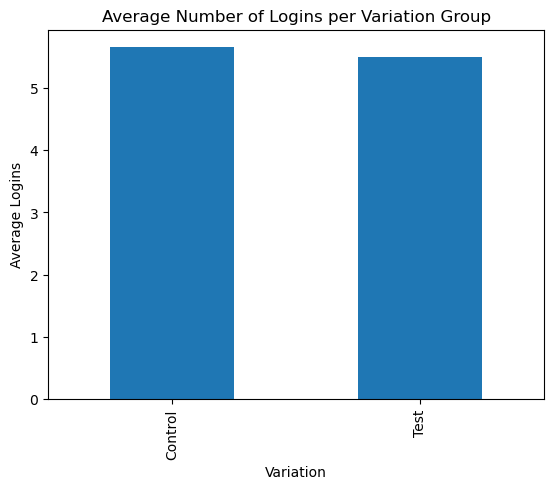

In [15]:
merge_demo_experiment.groupby('Variation')['logons_6_month'].mean().plot(kind='bar')
plt.title("Average Number of Logins per Variation Group")
plt.ylabel("Average Logins")
plt.show()


In [16]:
#cuántos pasos ha completado cada cliente
clientes_principales = df_web_data_total.groupby('client_id')['process_step'].count().sort_values(ascending=False)

#muestra los 10 clientes principales
top_client= clientes_principales.head(10)
print(top_client)


client_id
2128341    81
9800867    75
465007     72
9638063    71
3539274    69
2313292    61
4167815    61
5165430    60
2261960    59
7597144    58
Name: process_step, dtype: int64


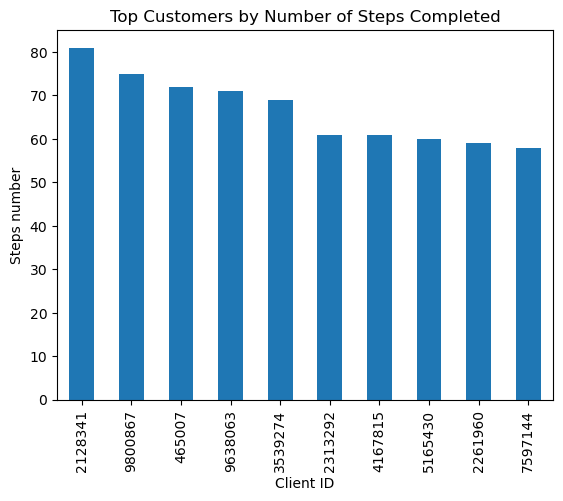

In [17]:
top_client.plot(kind='bar')
plt.title("Top Customers by Number of Steps Completed")
plt.xlabel('Client ID')
plt.ylabel('Steps number')
plt.show()


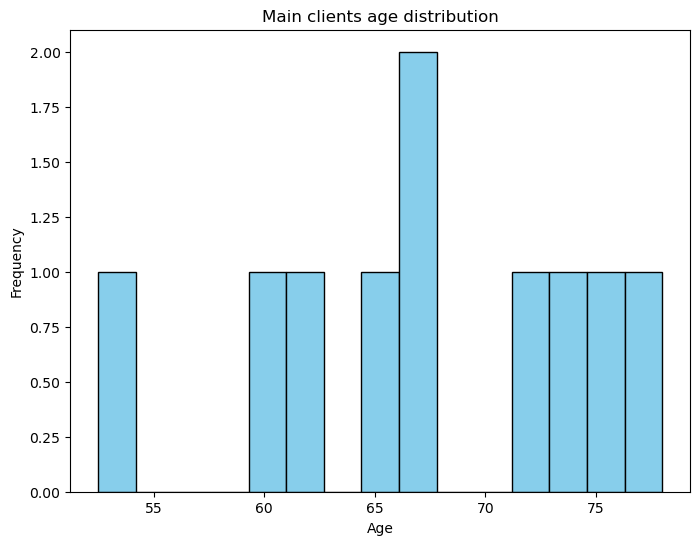

The average age of the main customers is: 67.2


In [18]:
# Filtrar el DataFrame de clientes demográficos para obtener los principales clientes
clientes_edad = merge_demo_experiment[merge_demo_experiment['client_id'].isin(top_client.index)]

# Visualizar la distribución de edades de los principales clientes
# Ajustar el número de bins para mejorar la visualización
plt.figure(figsize=(8,6))
clientes_edad['age'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title("Main clients age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)  # Eliminar la cuadrícula para mejor estética
plt.show()


# Calcular la edad promedio de los principales clientes
edad_promedio = clientes_edad['age'].mean()
print(f'The average age of the main customers is: {edad_promedio}')


In [19]:
merge_demo_experiment.columns

Index(['client_id', 'seniority_per_years', 'seniority_per_months', 'age',
       'gender', 'number_of_accounts', 'balance', 'calls_6_month',
       'logons_6_month', 'Variation'],
      dtype='object')

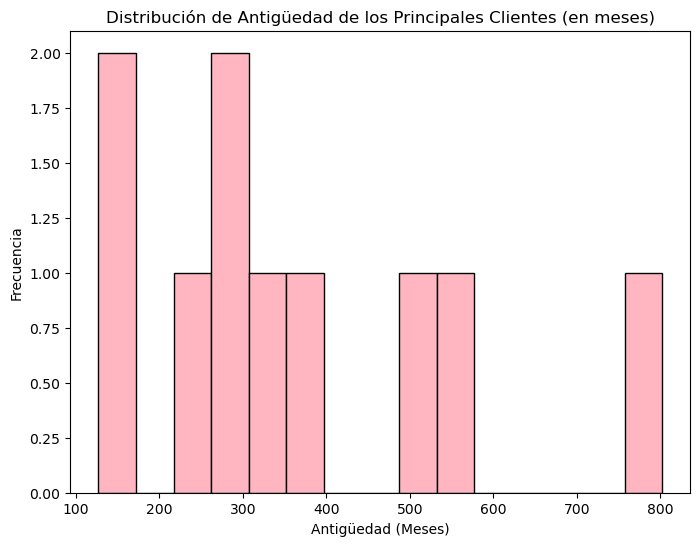

La antigüedad promedio de los principales clientes es: 373.6 meses


In [20]:
# Crear una columna que combine años y meses de permanencia
merge_demo_experiment["seniority_per_months"] = merge_demo_experiment["seniority_per_years"] * 12 + merge_demo_experiment["seniority_per_months"]

# Filtrar la permanencia de los principales clientes
clientes_permanencia = merge_demo_experiment[merge_demo_experiment['client_id'].isin(top_client.index)]["seniority_per_months"]

# Visualizar la permanencia de los principales clientes
plt.figure(figsize=(8,6))
clientes_permanencia.hist(bins=15, color = "lightpink", edgecolor='black')
plt.title('Distribución de Antigüedad de los Principales Clientes (en meses)')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Frecuencia')
plt.grid(False)  # Eliminar la cuadrícula para una mejor visualización
plt.show()

# Calcular la antigüedad promedio de los principales clientes
antiguedad_promedio = clientes_permanencia.mean()
print(f'La antigüedad promedio de los principales clientes es: {antiguedad_promedio} meses')


In [21]:
# Contar las interacciones
merge_demo_experiment['total_interactions'] = merge_demo_experiment['calls_6_month'] + merge_demo_experiment['logons_6_month']
top_clients = merge_demo_experiment[['client_id', 'total_interactions']].sort_values(by='total_interactions', ascending=False).head(10)
top_clients

,client_id,total_interactions
0,836976,15.0
35335,2105954,15.0
35356,9176530,15.0
35351,2839072,15.0
35346,9410580,15.0
11452,1412035,15.0
11453,5126257,15.0
35344,7708706,15.0
11455,16679,15.0
11456,8037730,15.0


In [22]:
merge_demo_experiment['total_interactions'] = merge_demo_experiment['calls_6_month'] + merge_demo_experiment['logons_6_month']
# Identificar a los principales clientes (top 10)
top_clients = merge_demo_experiment[['client_id', 'total_interactions', 'age', 'gender']].sort_values(by='total_interactions', ascending=False).head(10)
# Mostrar los principales clientes
top_clients

,client_id,total_interactions,age,gender
0,836976,15.0,60.5,U
35335,2105954,15.0,59.5,U
35356,9176530,15.0,36.5,M
35351,2839072,15.0,40.0,M
35346,9410580,15.0,70.0,M
11452,1412035,15.0,38.0,F
11453,5126257,15.0,24.5,U
35344,7708706,15.0,49.5,F
11455,16679,15.0,40.0,U
11456,8037730,15.0,69.0,F


In [29]:
df_final_experiment_cleaned


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,Test
70605,8788427,Test
70606,266828,Test
70607,1266421,Test


Tasa de Conversión por Proceso:

Descripción: Calcula la tasa de conversión en cada process_step para ambos grupos (Test y Control).

In [3]:
# Merge de datos
merged_data = pd.merge(df_web_data_total, df_final_experiment_cleaned, on='client_id', how='inner')

# Contar el número total de pasos por tipo de cliente
step_counts = merged_data.groupby(['process_step', 'Variation']).size().reset_index(name='counts')

# Tasa de conversión por paso
conversion_rate = merged_data.groupby(['process_step', 'Variation'])['visit_id'].nunique() / merged_data['visitor_id'].nunique()


In [4]:
step_counts 

,process_step,Variation,counts
0,confirm,Control,24144
1,confirm,Test,35977
2,start,Control,61247
3,start,Test,80169
4,step_1,Control,40379
5,step_1,Test,55128
6,step_2,Control,34708
7,step_2,Test,44558
8,step_3,Control,30205
9,step_3,Test,37382


In [5]:
conversion_rate

process_step  Variation
confirm       Control      0.281927
              Test         0.394708
start         Control      0.525433
              Test         0.620474
step_1        Control      0.406091
              Test         0.520291
step_2        Control      0.347436
              Test         0.450753
step_3        Control      0.316421
              Test         0.408086
Name: visit_id, dtype: float64

Promedio de Tiempo en Cada Proceso:

Descripción: Calcula el tiempo promedio que los usuarios pasan en cada process_step.

In [6]:
merged_data['date_time'] = pd.to_datetime(merged_data['date'] + ' ' + merged_data['time'])
merged_data.head()

,client_id,visitor_id,visit_id,process_step,date,time,Variation,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07,Test,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51,Test,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22,Test,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13,Test,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04,Test,2017-04-17 15:18:04


In [8]:
# Ordenar los datos por visit_id y date_time para calcular el tiempo transcurrido
sorted_merged_data = merged_data.sort_values(by=['visit_id', 'date_time'])

# Calcular el tiempo en cada process_step
sorted_merged_data['time_spent'] = sorted_merged_data.groupby('visit_id')['date_time'].diff().dt.total_seconds().fillna(0)

# Convertir el tiempo de segundos a minutos
sorted_merged_data['time_spent_minutes'] = sorted_merged_data['time_spent'] / 60

# Calcular el tiempo promedio por visit_id, process_step y Variation (Test o Control)
average_time_per_step = sorted_merged_data.groupby(['process_step', 'Variation'])['time_spent_minutes'].mean().reset_index()

# Renombrar la columna para mayor claridad
average_time_per_step.rename(columns={'time_spent_minutes': 'average_time_spent_minutes'}, inplace=True)

# Ordenar el DataFrame por average_time_spent_minutes
sorted_average_time_per_step = average_time_per_step.sort_values(by=['process_step', 'average_time_spent_minutes'], ascending=False)

sorted_average_time_per_step

,process_step,Variation,average_time_spent_minutes
9,step_3,Test,1.607323
8,step_3,Control,1.568846
7,step_2,Test,0.769109
6,step_2,Control,0.669962
4,step_1,Control,0.701237
5,step_1,Test,0.643193
3,start,Test,1.046901
2,start,Control,0.967919
0,confirm,Control,2.042240
1,confirm,Test,1.886313


Distribución de Visitas por Día:


In [10]:
# Contar el número de visitas por día y separado por 'Variation' (Test o Control)
visits_per_day_by_variation = merged_data.groupby(['date', 'Variation'])['visit_id'].count().reset_index()

# Renombrar la columna para mayor claridad
visits_per_day_by_variation.rename(columns={'visit_id': 'visits_per_day'}, inplace=True)

# Mostrar los resultados

# filtrar client_id 
visits_per_day_by_variation


,date,Variation,visits_per_day
0,2017-03-15,Control,800
1,2017-03-15,Test,1165
2,2017-03-16,Control,318
3,2017-03-16,Test,374
4,2017-03-17,Control,123
...,...,...,...
191,2017-06-18,Test,884
192,2017-06-19,Control,1042
193,2017-06-19,Test,1001
194,2017-06-20,Control,1398


Distribución de Visitas por Hora


In [11]:
# Extraer la hora de la columna 'date_time'
merged_data['hour'] = merged_data['date_time'].dt.hour

# Contar el número de visitas agrupadas por hora y 'Variation'
visits_per_hour_by_variation = merged_data.groupby(['hour', 'Variation']).size().reset_index(name='visitas')

# Mostrar los resultados
visits_per_hour_by_variation


,hour,Variation,visitas
0,0,Control,2988
1,0,Test,3957
2,1,Control,1919
3,1,Test,2335
4,2,Control,1000
5,2,Test,1215
6,3,Control,687
7,3,Test,837
8,4,Control,376
9,4,Test,481


Tasa de Conversión por Proceso

Descripción: Mide el porcentaje de usuarios que completan cada process_step

In [14]:
# Calcular el número de usuarios que completan cada step agrupado por Variation (Test o Control)
users_completed_by_variation = merged_data.groupby(['process_step', 'Variation'])['client_id'].nunique().reset_index(name='users_completed')

# Calcular el total de usuarios por Variation
total_users_by_variation = merged_data.groupby('Variation')['client_id'].nunique().reset_index(name='total_users')

# Unir ambos DataFrames para calcular la tasa de conversión
conversion_rate_by_step = pd.merge(users_completed_by_variation, total_users_by_variation, on='Variation')

# Calcular la tasa de conversión por process_step y Variation
conversion_rate_by_step['conversion_rate'] = (conversion_rate_by_step['users_completed'] / conversion_rate_by_step['total_users']) * 100


conversion_rate_by_step[['process_step', 'Variation', 'conversion_rate']]


,process_step,Variation,conversion_rate
0,confirm,Control,66.191562
1,confirm,Test,68.914107
2,start,Control,99.372862
3,start,Test,98.983016
4,step_1,Control,86.250475
5,step_1,Test,89.458719
6,step_2,Control,79.595844
7,step_2,Test,82.198939
8,step_3,Control,74.566071
9,step_3,Test,77.032047


Análisis de Puntos de Abandono

Descripción: Analiza en qué punto los usuarios tienden a abandonar el proceso, lo que puede indicar problemas en la experiencia del usuario.

In [18]:
# Define the new order of the process steps
order_of_steps = ['confirm', 'start', 'step_1', 'step_2', 'step_3']

# Initialize the DataFrame for the results
total_abandonment_analysis = pd.DataFrame()

# Iterate over each group (Test and Control)
for group in ['Test', 'Control']:
    # Filter by group
    group_data = merged_data[merged_data['Variation'] == group]

    # Create a DataFrame to count users by step for each group
    total_users_per_step = group_data.groupby('process_step')['client_id'].nunique().reindex(order_of_steps).reset_index(name='total_users')

    # Initialize the abandonment dictionary
    abandonments = {}

    # Calculate abandonments for each step
    for i in range(len(order_of_steps) - 1):  # Iterate until the penultimate step
        current_step = order_of_steps[i]
        next_step = order_of_steps[i + 1]

        # Number of users in the current step
        users_in_current_step = total_users_per_step.loc[total_users_per_step['process_step'] == current_step, 'total_users'].values[0]
        # Number of users in the next step
        users_in_next_step = total_users_per_step.loc[total_users_per_step['process_step'] == next_step, 'total_users'].values[0]

        # Calculate abandonments as the non-negative difference
        abandonments[current_step] = max(users_in_current_step - users_in_next_step, 0)

    # Convert the abandonment dictionary to DataFrame
    abandonment_analysis = pd.DataFrame(abandonments.items(), columns=['process_step', 'abandonments'])

    # Merge with the total users per step
    abandonment_analysis = pd.merge(abandonment_analysis, total_users_per_step, on='process_step', how='outer')

    # Calculate the abandonment rate
    abandonment_analysis['abandonment_rate'] = (abandonment_analysis['abandonments'] / abandonment_analysis['total_users']) * 100

    # Fill NaN values in the abandonment_rate column with 0
    abandonment_analysis['abandonment_rate'] = abandonment_analysis['abandonment_rate'].fillna(0)

    # Add a group column (Test or Control)
    abandonment_analysis['group'] = group

    # Concatenate the results for both groups
    total_abandonment_analysis = pd.concat([total_abandonment_analysis, abandonment_analysis], ignore_index=True)

# Display the combined results
print(total_abandonment_analysis[['group', 'process_step', 'abandonments', 'total_users', 'abandonment_rate']])


     group process_step  abandonments  total_users  abandonment_rate
0     Test      confirm           0.0        26902          0.000000
1     Test        start        3718.0        38640          9.622153
2     Test       step_1        2834.0        34922          8.115228
3     Test       step_2        2017.0        32088          6.285839
4     Test       step_3           NaN        30071          0.000000
5  Control      confirm           0.0        20898          0.000000
6  Control        start        4143.0        31374         13.205202
7  Control       step_1        2101.0        27231          7.715471
8  Control       step_2        1588.0        25130          6.319140
9  Control       step_3           NaN        23542          0.000000


Comparación de KPIs entre Grupos

Para comparar métricas clave entre el grupo de Test y el grupo Control, puedes utilizar un análisis de varianza (ANOVA) o pruebas t

In [15]:
import scipy.stats as stats

# Calcular la tasa de conversión por grupo y process_step
conversion_rates = merged_data.groupby(['Variation', 'process_step'])['client_id'].nunique().reset_index()

# Calcular el total de usuarios por grupo (Test y Control) para obtener la tasa de conversión
total_users_by_group = merged_data.groupby('Variation')['client_id'].nunique().reset_index(name='total_users')

# Unir los totales de usuarios para calcular la tasa de conversión
conversion_rates = pd.merge(conversion_rates, total_users_by_group, on='Variation')

# Calcular la tasa de conversión por process_step y grupo
conversion_rates['conversion_rate'] = conversion_rates['client_id'] / conversion_rates['total_users']

# Realizar ANOVA para comparar las tasas de conversión entre Test y Control
f_value, p_value = stats.f_oneway(
    conversion_rates[conversion_rates['Variation'] == 'Test']['conversion_rate'],
    conversion_rates[conversion_rates['Variation'] == 'Control']['conversion_rate']
)

print(f"F-value: {f_value}, P-value: {p_value}")


F-value: 0.07770750274547458, P-value: 0.787498679621692
